# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
df = pd.read_csv('/content/hasil_cluster.csv')
df.head()

,age,gender,income,purchase_frequency,purchase_amount,product_category,satisfaction_score,Cluster
0,27,Male,40682,0,18249,Books,6,0
1,29,Male,15317,2,4557,Clothing,6,2
2,37,Male,38849,2,11822,Clothing,6,0
3,30,Male,11568,0,4098,Food,7,2
4,31,Female,46952,1,19685,Clothing,5,0


In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   purchase_frequency  100000 non-null  int64 
 4   purchase_amount     100000 non-null  int64 
 5   product_category    100000 non-null  object
 6   satisfaction_score  100000 non-null  int64 
 7   Cluster             100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


# **3. EDA**

In [4]:
# Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

# Pisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

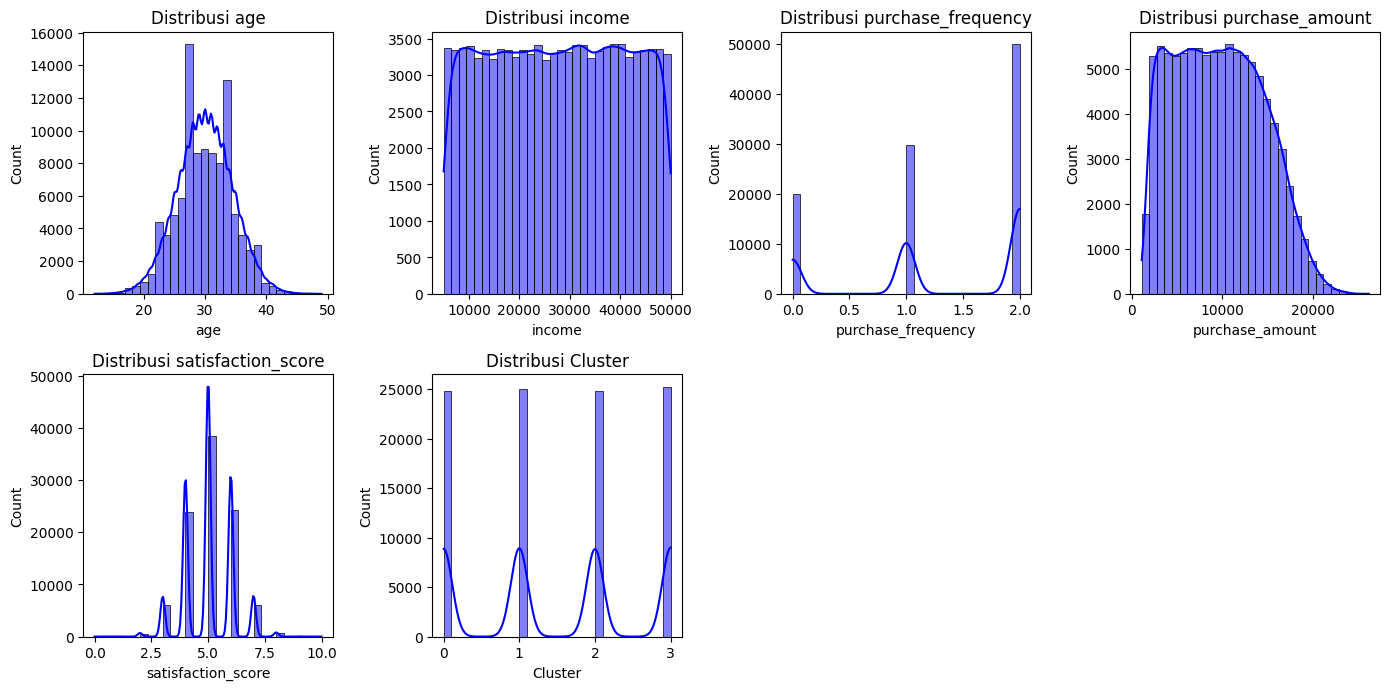

In [5]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-6-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-6-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


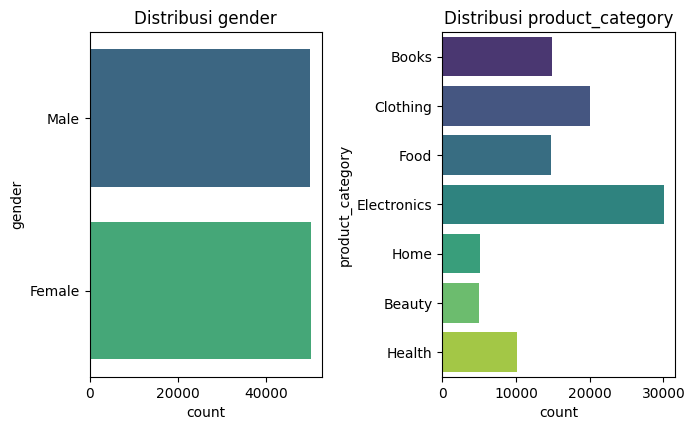

In [6]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

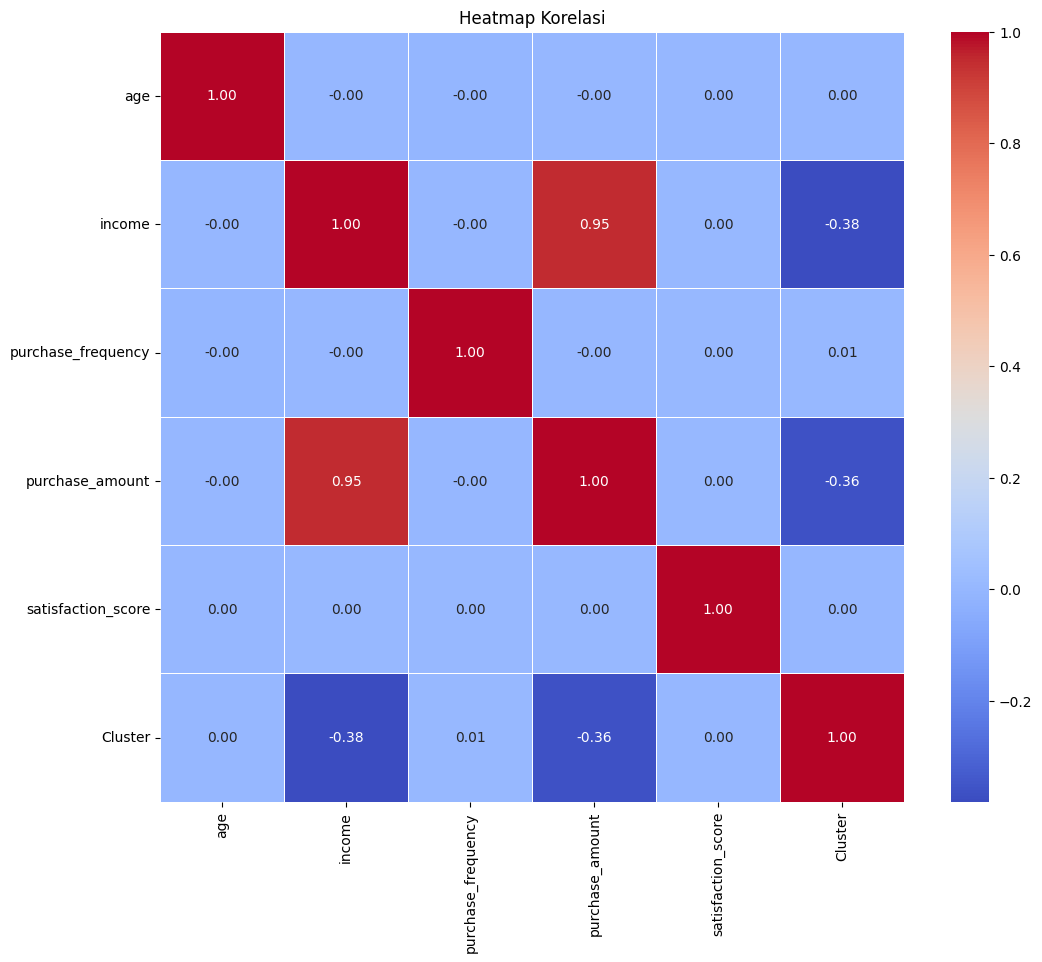

In [7]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

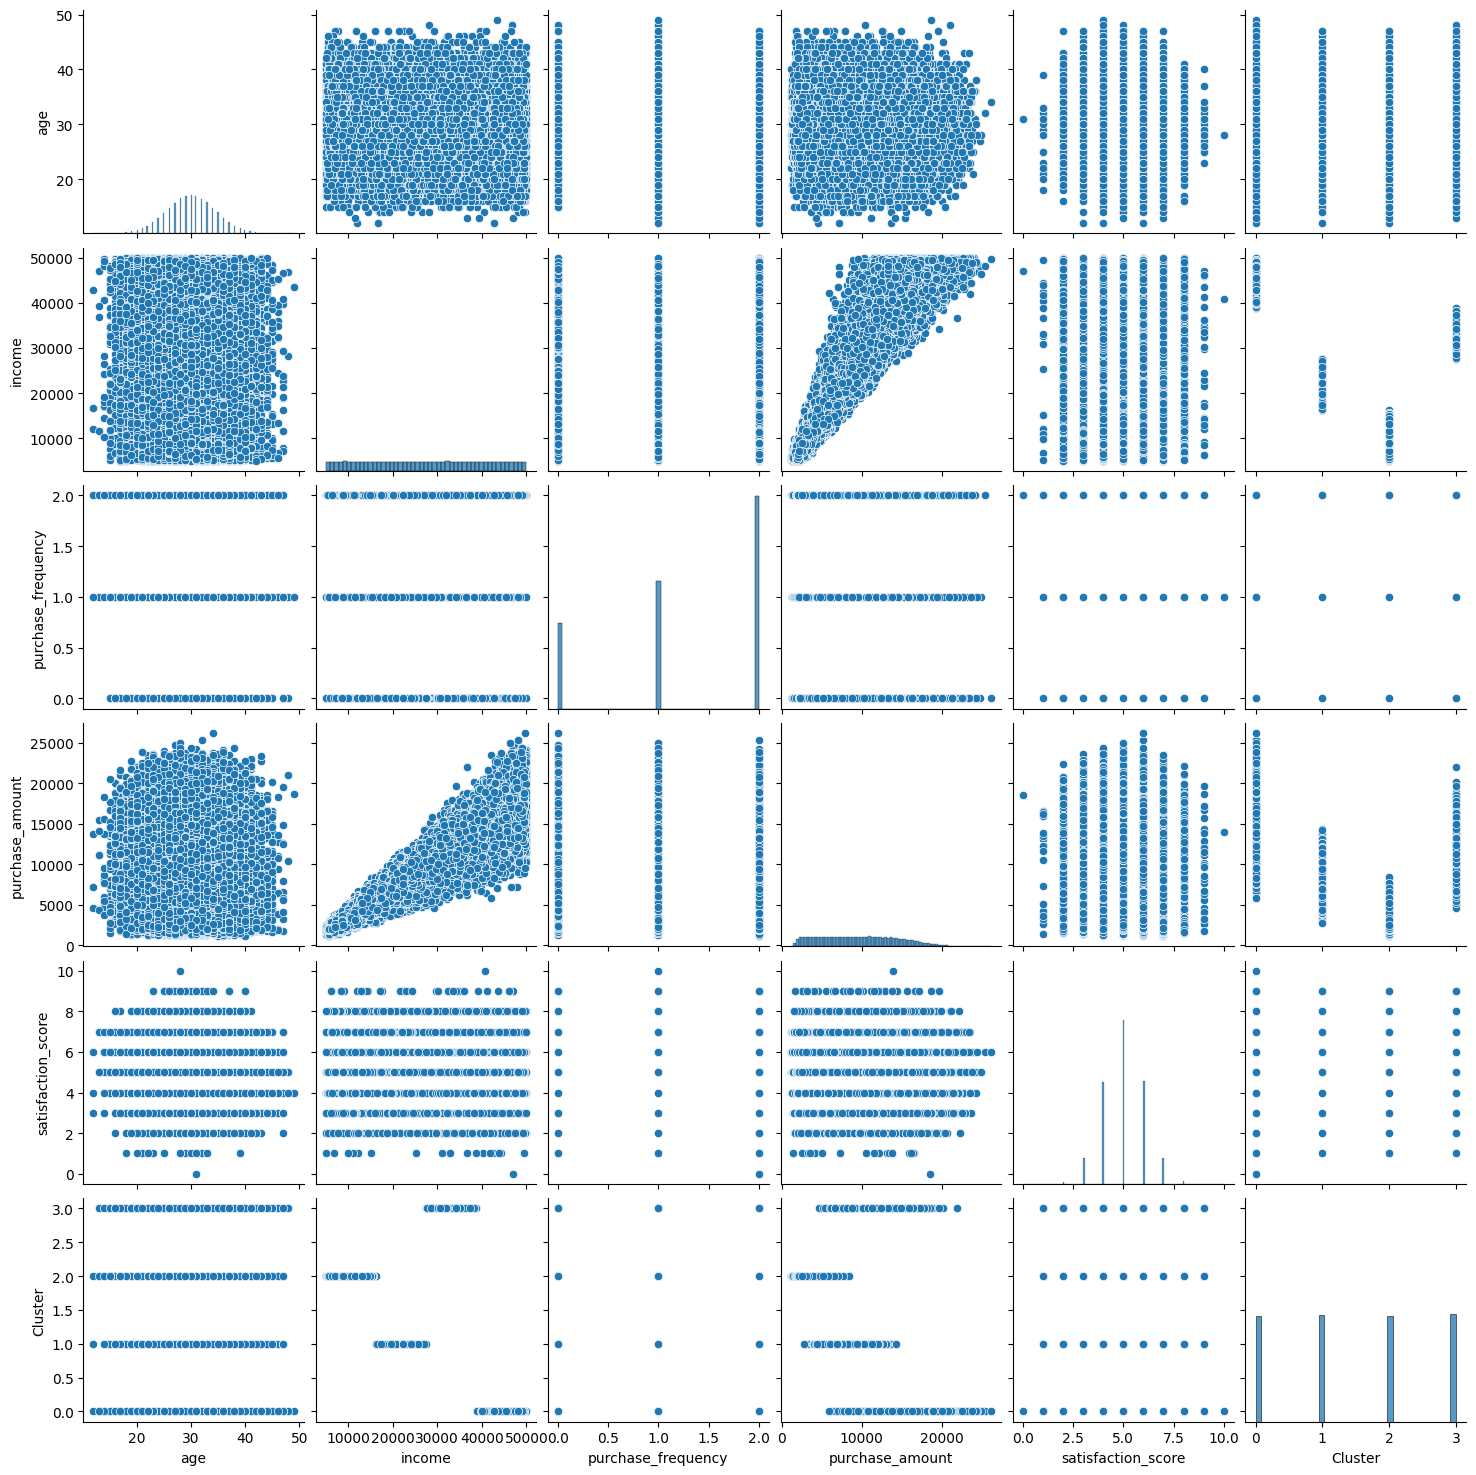

In [8]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-9-a18010e0ec21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


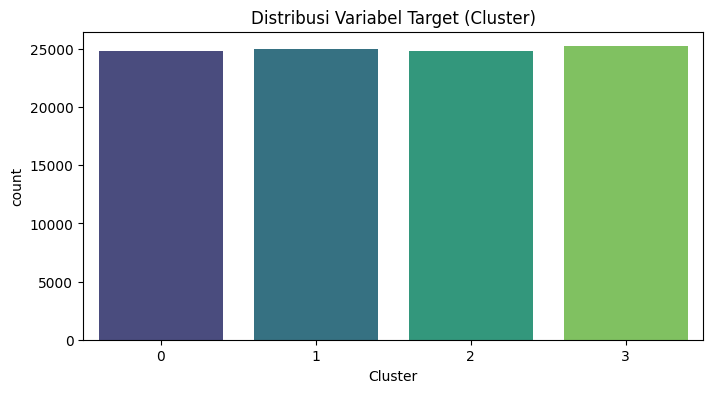

In [9]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Cluster)')
plt.show()

# **4. Label Encoder**

In [10]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['gender','product_category']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,age,gender,income,purchase_frequency,purchase_amount,product_category,satisfaction_score,Cluster
0,27,1,40682,0,18249,1,6,0
1,29,1,15317,2,4557,2,6,2
2,37,1,38849,2,11822,2,6,0
3,30,1,11568,0,4098,4,7,2
4,31,0,46952,1,19685,2,5,0


# **5.Data Split**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame containing the data
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(80000, 7), y_train=(80000,)
Test set shape: X_test=(20000, 7), y_test=(20000,)


# **6. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah

# Convert y_train to discrete values (e.g., integers) using a method like astype(int)
y_train = y_train.astype(int) # Changed line
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [13]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Convert y_test to binary if necessary
    y_test = y_test.astype(int)  # Convert to integer type (binary 0/1)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)   0.96745   0.938925  0.932454  0.935678
1            Decision Tree (DT)   1.00000   1.000000  1.000000  1.000000
2            Random Forest (RF)   0.99995   1.000000  0.999803  0.999902
3  Support Vector Machine (SVM)   0.98185   0.946243  0.984443  0.964965
4              Naive Bayes (NB)   0.95065   0.963307  0.837534  0.896029


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil yang ditunjukkan, dapat disimpulkan bahwa:

1. K-Nearest Neighbors (KNN):

    Akurasi tinggi (0.96745), namun masih sedikit lebih rendah daripada model seperti Decision Tree dan Random Forest.
    Precision dan Recall cukup baik, tetapi tidak setinggi Decision Tree atau Random Forest, yang menunjukkan bahwa KNN mungkin mengalami sedikit kesalahan dalam mengklasifikasikan beberapa sampel positif atau negatif.

2. Decision Tree (DT):

    Model ini memiliki akurasi, precision, recall, dan F1-score sempurna (1.000). Hasil yang sempurna ini mungkin menunjukkan model mengalami overfitting, terutama jika data uji memiliki karakteristik yang sama dengan data latih.

3. Random Forest (RF):

    Hampir sempurna dalam seluruh metrik dengan akurasi 0.99995 dan F1-score 0.99902, yang juga menunjukkan potensi overfitting ringan, meskipun model ensemble seperti Random Forest umumnya lebih baik dalam menghindari overfitting dibandingkan Decision Tree.

4. Support Vector Machine (SVM):

    SVM memiliki akurasi dan precision yang tinggi (masing-masing 0.98185 dan 0.946243), namun recall sedikit lebih rendah dibandingkan model lain yang sangat baik.
    Meski SVM menunjukkan performa yang bagus, penurunan recall dapat berarti bahwa model ini sedikit kurang sensitif terhadap deteksi positif, sehingga ada beberapa kasus positif yang mungkin tidak terdeteksi dengan baik.

5. Naive Bayes (NB):

    Akurasi dan precision (0.95665 dan 0.963307) cukup baik, namun recall terendah (0.837534) di antara model lainnya, yang menunjukkan bahwa Naive Bayes mungkin mengklasifikasikan terlalu banyak sampel negatif.
    Recall rendah ini mengindikasikan kelemahan dalam mengidentifikasi kelas positif dengan benar. Sehingga, Naive Bayes memiliki kecenderungan untuk menghasilkan banyak false negatives.